# Partial Query figures - Figure 2 in the paper

In [1]:
%matplotlib inline
import os.path

import pandas as pd
import sourmash, sourmash.fig

import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from matplotlib import pyplot
import numpy
import scipy

In [2]:
# Colors & matplotlib style

viridian         = "#4b9179ff" # Green with a hint of blue
selective_yellow = "#ffb500ff" # Excavator yellow
rose             = "#ff1164ff"
hot_pink         = "#ff70b0ff" 
pumpkin          = "#ff7a24ff"
sycamore         = "#939f49ff"
steel_blue       = "#3e80b8ff" 
bone             = "#ded5baff" # Off-white
white_rock       = "#f1ece0ff" # Lighter off-white
fuscous_gray     = "#5c594fff" # Darkish gray
newblack         = "#0e3452ff" # Almost black, blue-tinted

# Nice color mixer: https://www.colorhexa.com/
mixed_colors = {}

def set_mix(*cols):
    mixed_colors[frozenset(cols[:-1])] = cols[-1]

set_mix(selective_yellow, rose, "#ff6332ff")
set_mix(rose, viridian, "#a5516eff")
set_mix(selective_yellow, viridian, "#a5a33cff")
set_mix(rose, viridian, selective_yellow, "#c3724aff")

set_mix(bone, rose, "#ef738fff")
set_mix(white_rock, rose, "#f87fa2ff" )

    
def mixed(*cols):
    return mixed_colors[frozenset(cols)]

# Style legend box
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = '1'
plt.rcParams["legend.facecolor"] = 'white'

plt.rcParams["axes.facecolor"] = white_rock

# Despine
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False

# plt.rcParams.keys()

## Figure (a): we can recover strain variants by query with related genome

In [3]:
# loading functions

def extract_filename(s):
    return os.path.basename(s).split('.')[0]

def load_search_csv(filename, sim_colname):
    df = pd.read_csv(filename)
    df['canonical'] = df['filename'].apply(extract_filename)
    
    df.columns = [sim_colname, '_drop_', '_drop_', '_drop_', 'canonical']
    df = df.drop('_drop_', axis=1)
    
    return df

In [4]:
name = 'gingivalis'

cmp = load_search_csv('files_partial_query/{}.csv'.format(name), 'genome_sim')
nbhd_cont = load_search_csv('files_partial_query/{}.x.contigs.cont.csv'.format(name), 'nbhd_cont')

join_df = cmp.set_index('canonical').join(nbhd_cont.set_index('canonical'))
join_df = join_df[join_df['genome_sim'] > 0.00]

gingivalis_df = join_df.sort_values(by='genome_sim').reindex()

####

name = 'denticola'

cmp = load_search_csv('files_partial_query/{}.csv'.format(name), 'genome_sim')
nbhd_cont = load_search_csv('files_partial_query/{}.x.contigs.cont.csv'.format(name), 'nbhd_cont')

join_df = cmp.set_index('canonical').join(nbhd_cont.set_index('canonical'))
join_df = join_df[join_df['genome_sim'] > 0.00]

denticola_df = join_df.sort_values(by='genome_sim').reindex()

####

name = 'bacteroides'

cmp = load_search_csv('files_partial_query/{}.csv'.format(name), 'genome_sim')
nbhd_cont = load_search_csv('files_partial_query/{}.x.contigs.cont.csv'.format(name), 'nbhd_cont')

join_df = cmp.set_index('canonical').join(nbhd_cont.set_index('canonical'))
join_df = join_df[join_df['genome_sim'] > 0.00]

bacteroides_df = join_df.sort_values(by='genome_sim').reindex()

/Users/t/dev/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


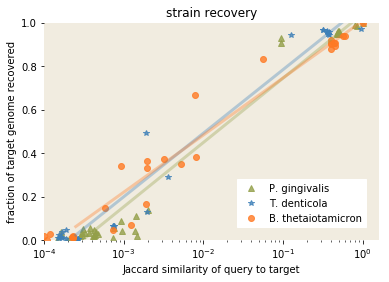

In [5]:
data = [(gingivalis_df.genome_sim, gingivalis_df.nbhd_cont),
        (denticola_df.genome_sim, denticola_df.nbhd_cont),
        (bacteroides_df.genome_sim, bacteroides_df.nbhd_cont)]
labels = ['P. gingivalis', 'T. denticola', 'B. thetaiotamicron']
markers = '^*o'

# colors = [selective_yellow, rose, viridian]
colors = [sycamore, steel_blue, pumpkin]

# Plot data sets
for datum, marker, color, label in zip(data,markers,colors,labels):
    pyplot.semilogx(datum[0], datum[1], marker, alpha=0.8, color=color, label=label)

# Plot fit lines
def func(x, a, b, c):
    return a*numpy.log(b*x) + c

for datum, color in zip(data, colors):
    params, covar = scipy.optimize.curve_fit(func, datum[0], datum[1],
                                             p0=(1,1,3))

    xx = numpy.linspace(0.00025, 1)
    pyplot.semilogx(xx, func(xx, *params), 'b', alpha=0.35, lw=3, color=color)


pyplot.xlabel('Jaccard similarity of query to target')
pyplot.ylabel('fraction of target genome recovered')
pyplot.title('strain recovery')
legend = pyplot.legend(loc='lower right', numpoints=1, borderaxespad=1.3)
# legend.get_frame().set_facecolor(bone)
# legend.get_frame().set_linewidth(0.0)
pyplot.axis(xmin=1e-4, ymin=0, ymax=1)
pyplot.savefig('partial_query_a.pdf', format='pdf', bbox_inches="tight")

## Figure (b) - Proteiniclasticum

k-mer search against NCBI Genbank showed that there was an unexpected species in podarV - some sort of contaminant that was detected in Shakya et al., 2014, by other methods, but at the time was unknown.  In the Awad et al. paper, we discovered that it was probably a member of the Proteiniclasticum genus, based on Jaccard similarity with P. ruminis.

Briefly: 

1. we used three P. ruminis genomes for neighborhood queries (k=31, r=1);
2. we then retrieved the unitigs, combined them, and ran another query.
3. from this query, we then extracted the matching reads and assembled them with megahit.
4. the resulting assembly has 13.4% Jaccard similarity with P. ruminis ML2, and 95%+ Jaccard similarity with all of the neighborhoods.
5. CheckM informs us that it is 100% complete with 8% contamination
6. There are no matches to it in genbank other than P. ruminis.



In [6]:
# Load signatures

nbhd = open("files_partial_query_b/P_ruminis_shakya.fa.gz.sig")
sigs = list(sourmash.signature.load_signatures(nbhd))
sig = sigs[0]
mins = set(sig.minhash.get_mins())
nbhd_mins = set(mins)

query = open("files_partial_query_b/P_ruminis_DSM_24773.fna.gz.sig")
sigs = list(sourmash.signature.load_signatures(query))
sig = sigs[0]
mins = set(sig.minhash.get_mins())
dsm_mins = set(mins)


sim = open("files_partial_query_b/P_ruminis_ML2.fna.gz.sig")
sigs = list(sourmash.signature.load_signatures(sim))
ml2_mins = sigs[0].minhash.get_mins()

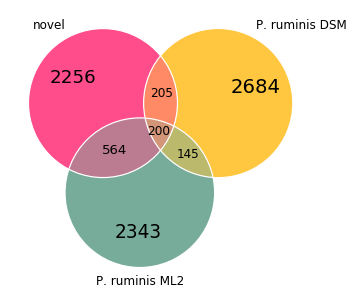

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# Make venn diagram with sets themselves instead of intersections

plt.figure(figsize=(5.5,5.5))

fill = venn3(subsets = ([set(nbhd_mins), set(dsm_mins), set(ml2_mins)]), 
      set_labels = ('novel', 'P. ruminis DSM', 'P. ruminis ML2'),
     subset_label_formatter = None, alpha=.75)
outlines = venn3_circles(subsets = ([set(nbhd_mins), set(dsm_mins), set(ml2_mins)]), lw=1.2, color="white")

# Set colors
cols = [rose, selective_yellow, viridian]
fill.get_patch_by_id('100').set_color(cols[0])
fill.get_patch_by_id('010').set_color(cols[1])
fill.get_patch_by_id('001').set_color(cols[2])

fill.get_patch_by_id('101').set_color(mixed(cols[0],cols[2])) 
fill.get_patch_by_id('011').set_color(mixed(*cols[1:]))
fill.get_patch_by_id('110').set_color(mixed(*cols[:-1])) 

fill.get_patch_by_id('111').set_color(mixed(*cols)) 

ids = ["{:{fill}3b}".format(c, fill='0') for c in range(1,8)]
values = [int(fill.get_label_by_id(_id).get_text()) for _id in ids]
min_value, max_value = min(values), max(values)
min_size, max_size = 12, 20
for (_id, value) in zip(ids, values):
    fill.get_patch_by_id(_id).set_edgecolor('none')
    
    size = min_size + (max_size-min_size) * ((value-min_value)/max_value)
    fill.get_label_by_id(_id).set_fontsize(size)
    
pyplot.savefig('partial_query_b.pdf', format='pdf', bbox_inches="tight")